In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts() # imbalance classification only 2037 have left out 10000

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts() # to know about categories -> some imbalanced

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts() #balanced

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
981,749,Germany,Female,44,0,71497.79,2,0,0,151083.8,0


In [12]:
# onehot encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [13]:
#scale data first so convergen will be easy

In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_test.shape
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(tf.keras.Input(shape=(11,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

2025-12-30 08:48:08.851214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767084489.153837      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767084489.244372      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767084490.015606      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767084490.015757      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767084490.015762      17 computation_placer.cc:177] computation placer alr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6168 - loss: 0.6715 - val_accuracy: 0.7837 - val_loss: 0.5213
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4965 - val_accuracy: 0.7981 - val_loss: 0.4622
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4645 - val_accuracy: 0.8062 - val_loss: 0.4412
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8091 - loss: 0.4302 - val_accuracy: 0.8075 - val_loss: 0.4333
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.4291 - val_accuracy: 0.8094 - val_loss: 0.4284
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8198 - loss: 0.4237 - val_accuracy: 0.8125 - val_loss: 0.4222
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8304 - loss: 0.4008 - val_accuracy: 0.8144 - val_loss: 0.4154
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.4053 - val_accu

In [23]:
#weight and biases
model.layers[0].get_weights()

[array([[ 0.09905675,  0.0199822 , -0.22026058, -0.12423706,  0.00561839,
          0.02500667,  0.01921661,  0.12673247, -0.18778956,  0.02755287],
        [ 0.6673495 , -0.13060224,  0.71161747, -0.6271671 , -0.8346454 ,
          0.10742038, -0.5598925 , -0.43493533,  0.4361825 ,  0.9872247 ],
        [ 0.14475054,  0.04726612,  0.24002512, -0.7689942 ,  0.44166216,
          0.4504545 , -0.05699741, -0.3714084 , -0.8792241 ,  0.24350788],
        [-0.11115427,  0.4009909 ,  0.04536826, -0.3560994 , -0.08136266,
          0.14712904, -0.0936777 ,  0.21558575,  0.29197824, -0.27493072],
        [-0.19038458,  1.3351654 ,  1.287592  ,  0.10758518,  0.22515866,
          0.3967623 ,  0.09476846,  0.6158515 , -0.41383702,  0.02861709],
        [ 0.1265607 , -0.04578168,  0.02845997,  0.31823507, -0.3502134 ,
          0.56735617,  1.0644912 , -0.46089157, -0.29086715,  0.04592102],
        [ 0.49772558,  0.08036642,  0.10440648, -0.17415905, -0.06436264,
          0.44433585, -0.1456324

In [24]:
y_log = model.predict(X_test_scaled) # output is not zero because we using sigmoid and sigmoid give probability

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
y_pred = np.where(y_log > 0.5,1,0)

In [26]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.699999988079071,
  0.7970312237739563,
  0.8042187690734863,
  0.8092187643051147,
  0.8123437762260437,
  0.8184375166893005,
  0.8226562738418579,
  0.8290625214576721,
  0.8343750238418579,
  0.839062511920929,
  0.8428124785423279,
  0.8493750095367432,
  0.8532812595367432,
  0.8531249761581421,
  0.8557812571525574,
  0.85546875,
  0.8575000166893005,
  0.8573437333106995,
  0.8579687476158142,
  0.8584374785423279,
  0.8600000143051147,
  0.858593761920929,
  0.8579687476158142,
  0.860156238079071,
  0.8598437309265137,
  0.8607812523841858,
  0.8615624904632568,
  0.8618749976158142,
  0.8634374737739563,
  0.8618749976158142,
  0.8620312213897705,
  0.8651562333106995,
  0.8623437285423279,
  0.86328125,
  0.8628125190734863,
  0.8646875023841858,
  0.8634374737739563,
  0.864062488079071,
  0.8648437261581421,
  0.8659374713897705,
  0.8653125166893005,
  0.8653125166893005,
  0.8635937571525574,
  0.8660937547683716,
  0.8643749952316284,
  0.862656235694885

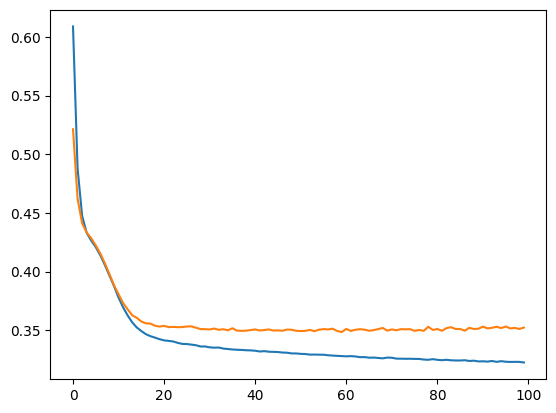

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

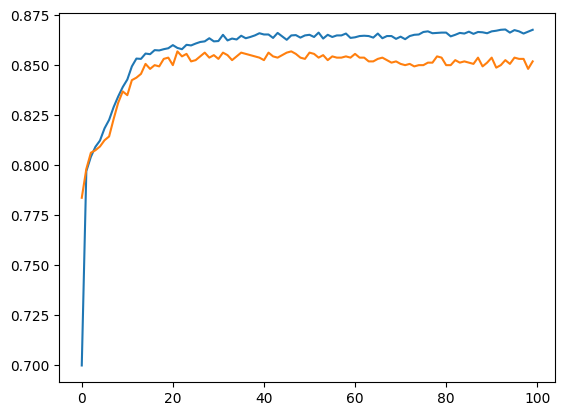

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])